In [34]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
sns.set_theme(style="white")

In [38]:
csv = "https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Countries%20in%20the%20World%20by%20Population%202022/world_population.csv"
df = pd.read_csv(csv)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [39]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
Population (2020),194.0,3.991822e+07,1.479012e+08,97929.00,1.906649e+06,8842197.500,2.877536e+07,1.439324e+09
Yearly Change,194.0,1.234433e+00,1.069067e+00,-1.35,4.325000e-01,1.095,2.060000e+00,3.840000e+00
Net Change,194.0,4.190849e+05,1.229871e+06,-383840.00,4.274250e+03,62546.000,3.636722e+05,1.358663e+07
Density (P/Km²),194.0,1.790155e+02,2.839405e+02,2.00,3.250000e+01,83.500,2.177500e+02,2.239000e+03
Land Area (Km²),194.0,6.636646e+05,1.838294e+06,180.00,2.533500e+04,116550.000,5.078675e+05,1.637687e+07
Migrants (net),194.0,3.354253e+03,1.160331e+05,-532687.00,-1.003525e+04,-980.000,8.506000e+03,9.548060e+05
Fert. Rate,194.0,2.729897e+00,1.267421e+00,1.10,1.800000e+00,2.300,3.600000e+00,7.000000e+00
Med. Age,194.0,3.027835e+01,9.049366e+00,15.00,2.200000e+01,30.000,3.800000e+01,4.800000e+01
Urban Pop %,194.0,5.963402e+01,2.222670e+01,13.00,4.300000e+01,60.000,7.875000e+01,1.000000e+02
World Share,194.0,5.120619e-01,1.897467e+00,0.00,2.250000e-02,0.110,3.675000e-01,1.847000e+01


<AxesSubplot:>

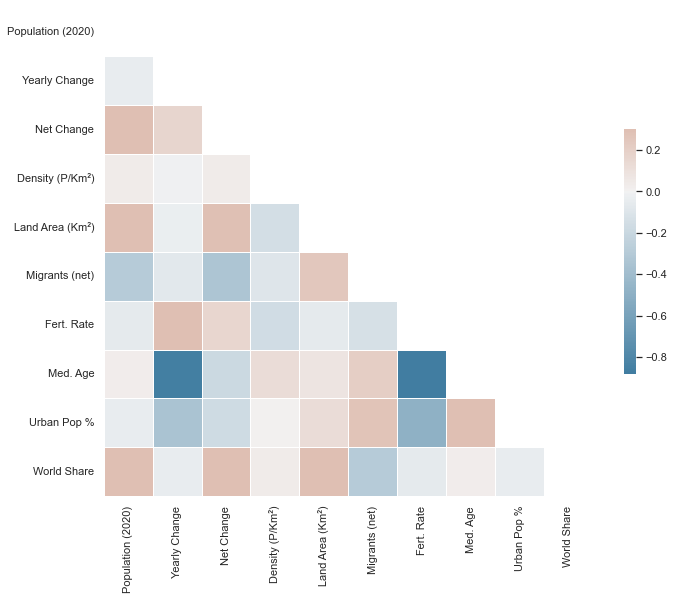

In [40]:
corr = df.iloc[:,1:].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(235, 25, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})